# <font color = 'green'> **Sugarcane Production Project** <font>

## Overview

This project analyzes global sugarcane production by exploring key factors like production volume, land usage, and yield per hectare across different countries and continents. <br>
Through comprehensive **Exploratory Data Analysis (EDA)**, we'll identify top-producing regions, understand relationships between variables, and visualize the distribution of production. <br>
The insights gained will help inform agricultural strategies and enhance resource management in the sugarcane industry.

## **Data Cleaning**

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("C:/Users/Admin/Downloads/List of Countries by Sugarcane Production.csv")

In [7]:
df.shape

(103, 7)

In [9]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [11]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.', '')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.', '')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [13]:
df.rename(columns = {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [15]:
df.head(3)

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1


In [17]:
df.isnull().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [19]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [21]:
df = df.dropna().reset_index()

In [23]:
df.drop(['index', 'Unnamed: 0'], axis = 1, inplace = True)

In [25]:
df.head(1)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5


In [27]:
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_person(Kg)'] = df['Production_per_person(Kg)'].astype(float)
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)

In [29]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [31]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

## **Univariate Analysis**

In [34]:
df.head(3)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1


### *How many countries produce sugarcane from each continent?*

In [37]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

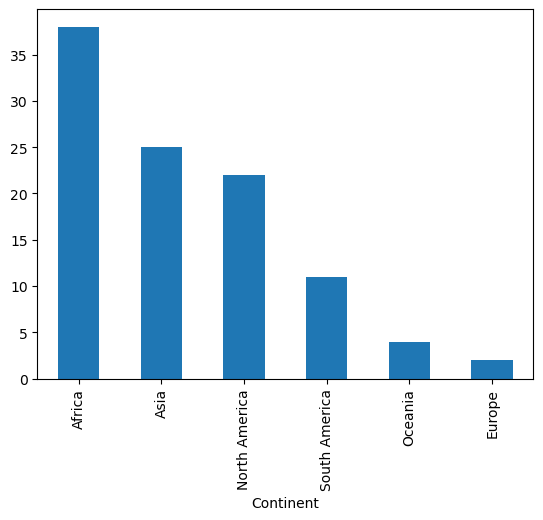

In [39]:
df['Continent'].value_counts().plot(kind = 'bar')

>Africa has maximum number of countries which produces sugarcane.

### **Distribution of the columns**

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

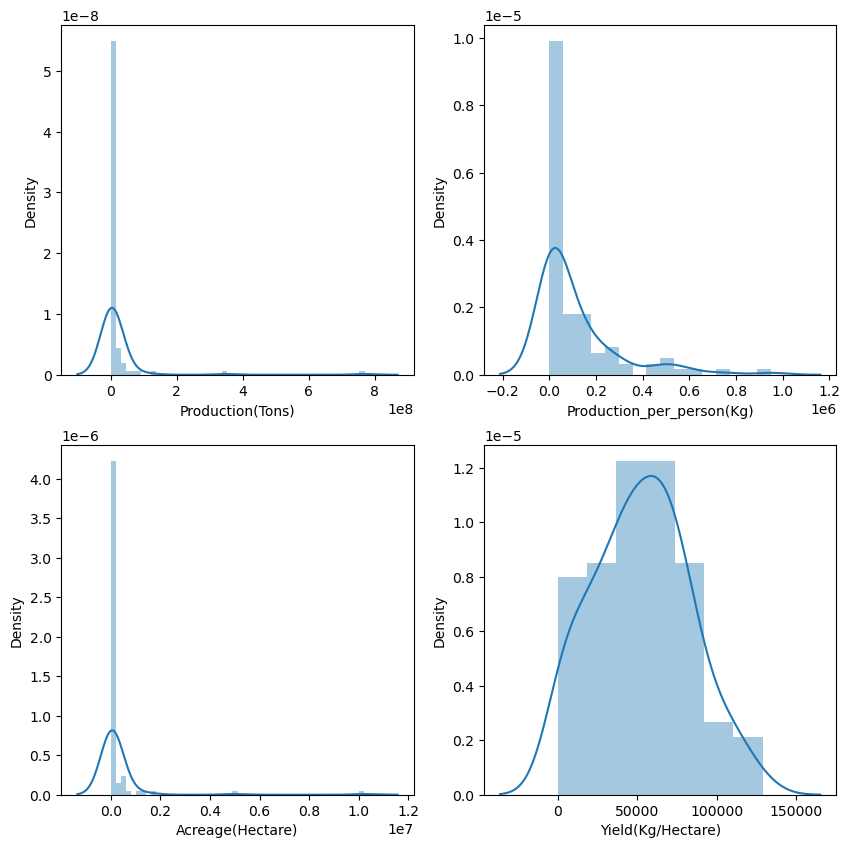

In [43]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.distplot(df['Production_per_person(Kg)'])

plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

### **Checking For Outliers**

<Axes: ylabel='Yield(Kg/Hectare)'>

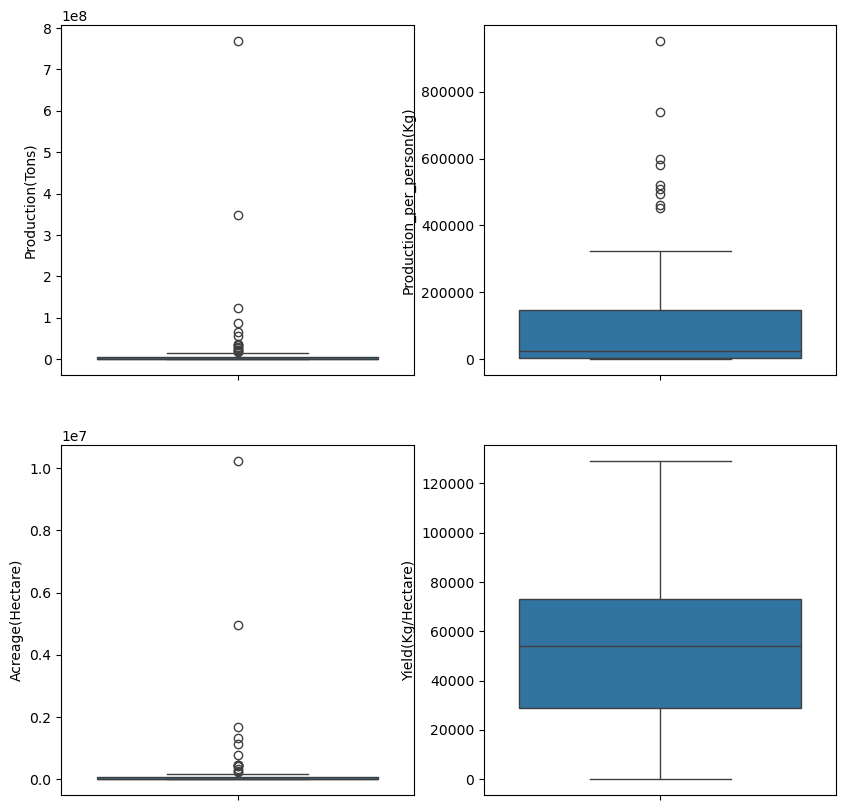

In [45]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.boxplot(df['Production_per_person(Kg)'])

plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

In [31]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


### Violin Plot for Production (Tons)

<Axes: ylabel='Production(Tons)'>

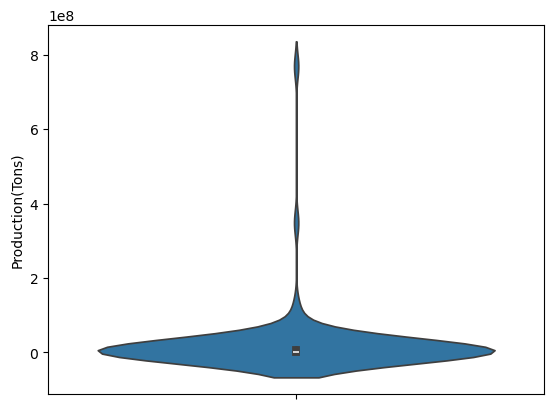

In [33]:
sns.violinplot(df['Production(Tons)'])

## **Bivariate Analysis**

In [35]:
df.head(2)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5


### *Which country produces maximum sugarcane?*

In [47]:
df_pr = df[['Country', 'Production(Tons)']].set_index('Country')

In [38]:
df_pr

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


<Axes: ylabel='Production(Tons)'>

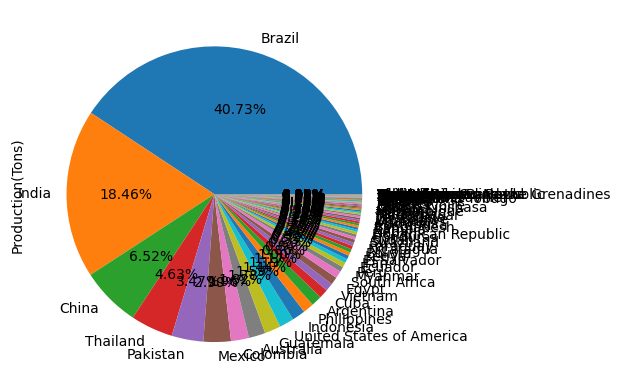

In [49]:
df_pr['Production(Tons)'].plot(kind = 'pie', autopct = '%.2f%%')

>**Brazil, India and China have 65% of production of sugarcane**

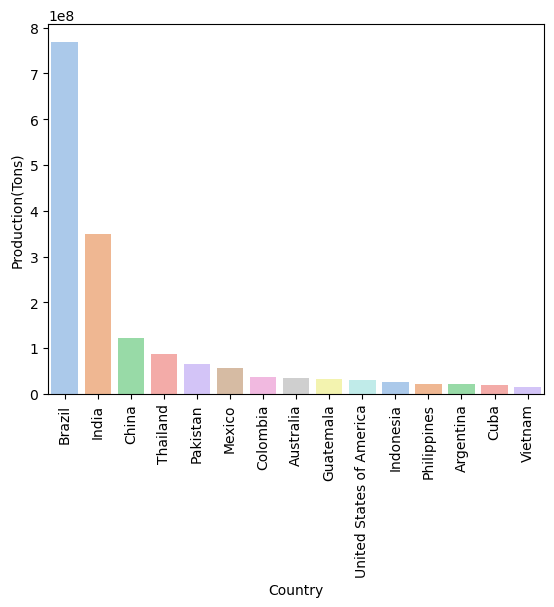

In [43]:
ax  = sns.barplot(data = df.head(15), x = 'Country', y = 'Production(Tons)', 
                  hue = 'Country', palette='pastel')
ax.tick_params(axis='x', rotation=90) 


> The country **"Brazil"** produces maximum sugarcane out of all countries.

### *Which country has highest land?*

In [45]:
df.head(1)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5


In [46]:
df_acr = df.sort_values(by = 'Acreage(Hectare)', ascending = False)

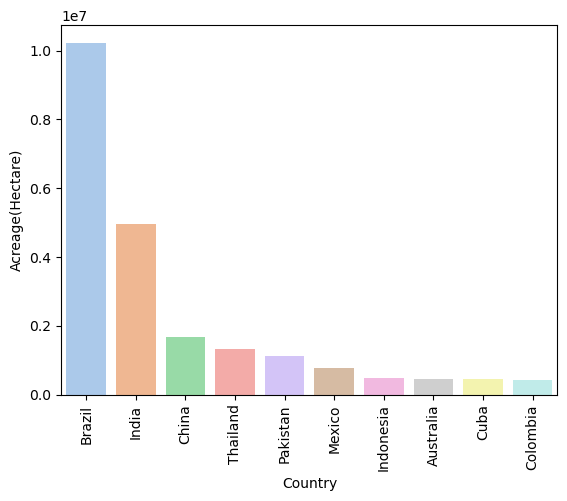

In [47]:
ax = sns.barplot(data = df_acr.head(10), x = 'Country', y = 'Acreage(Hectare)', 
            hue = 'Country', palette = 'pastel')
ax.tick_params(axis = 'x', rotation = 90)

> **Brazil** has the highest land

### *Which country has highest yield per hectare?*

In [50]:
df_yield = df.sort_values(by = "Yield(Kg/Hectare)", ascending = False)

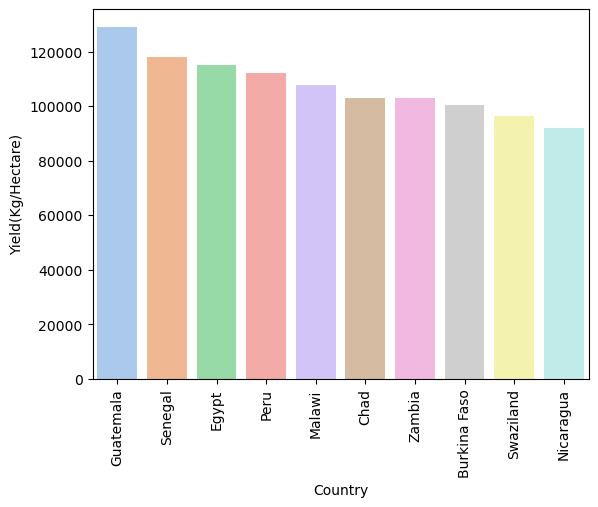

In [51]:
ax = sns.barplot(data = df_yield.head(10), x = 'Country', y = 'Yield(Kg/Hectare)', 
            hue = 'Country', palette = 'pastel')
ax.tick_params(axis = 'x', rotation = 90)

>**Guatemala** has highest yield per hectare

### *Which country has highest production per persosn?*

In [54]:
df_pro = df.sort_values(by = 'Production_per_person(Kg)', ascending = False).head(10)

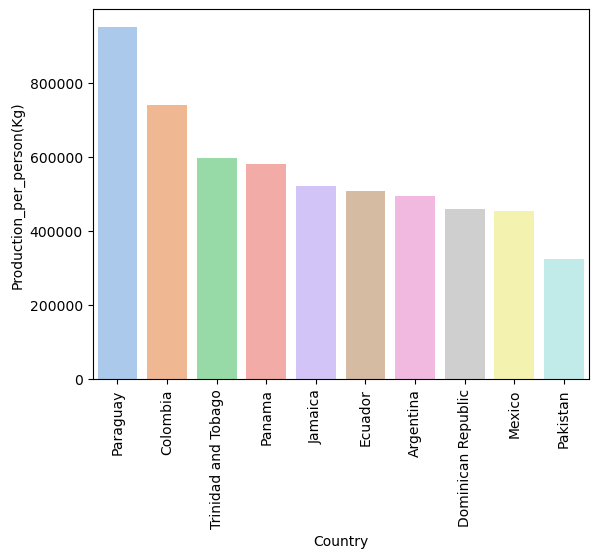

In [55]:
ax = sns.barplot(data = df_pro, x = 'Country', y = 'Production_per_person(Kg)', 
            hue = 'Country', palette = 'pastel')
ax.tick_params(axis = 'x', rotation = 90)

> Production per Person is highest in **Paraguay**

### *Correlation Analysis*

In [58]:
corr = df.select_dtypes(include = ['number']).corr()
corr

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

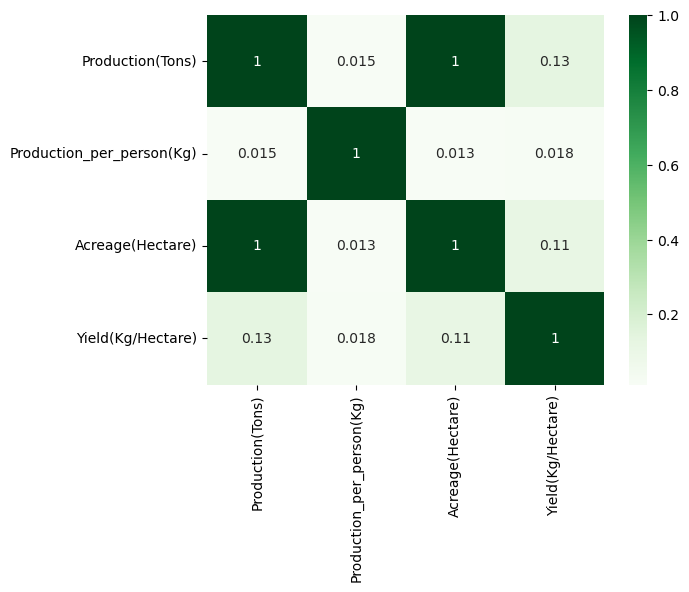

In [59]:
sns.heatmap(corr, annot = True, cmap = 'Greens')

### *Do countries with highest land produce more sugarcane?*

In [61]:
df.head(0)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

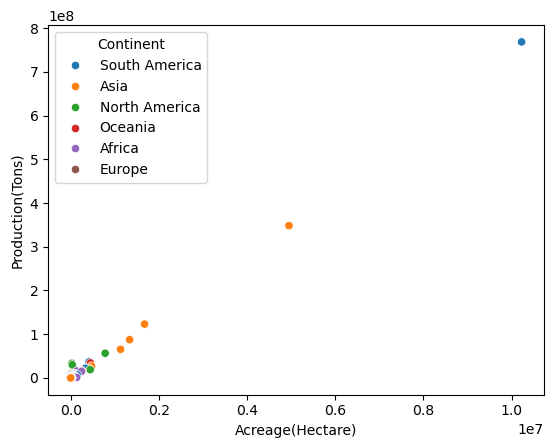

In [62]:
sns.scatterplot(data = df, x = 'Acreage(Hectare)', y = 'Production(Tons)', hue = 'Continent')

>Overall increase in land increases the production

### *Do countries which yield more sugarcane per hectare produces more sugarcane in total?*

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

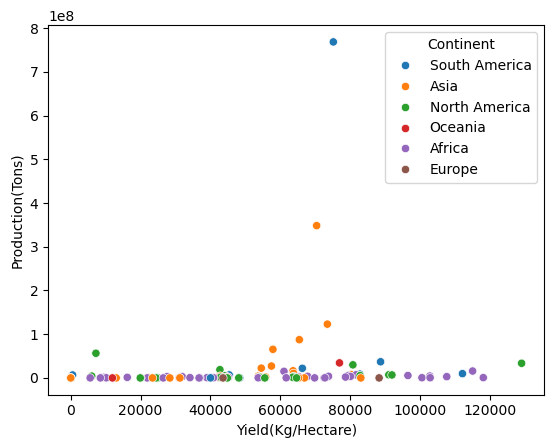

In [65]:
sns.scatterplot(data = df,  x = 'Yield(Kg/Hectare)', y = 'Production(Tons)', hue = 'Continent' )

There is no relation between yield of sugarcane per hectre and overall sugarcane production.

## **Continental Analysis**

In [68]:
df_cnt = df.groupby('Continent').sum()

In [69]:
df_cnt

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [70]:
df_cnt = df_cnt.drop('Country', axis = 1)

In [71]:
df_cnt

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


### **Correlation Analysis**

In [73]:
df_cnt.corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.522211,0.994897,0.091201
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000


<Axes: >

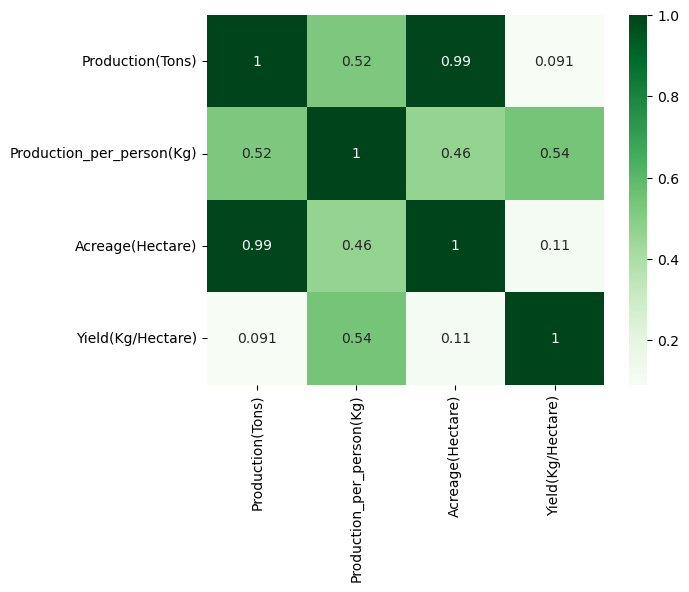

In [74]:
sns.heatmap(data = df_cnt.corr(), annot = True, cmap = 'Greens')

### *Which continent produces maximum sugarcane?*

In [76]:
df_cnt.sort_values(by = 'Production(Tons)', ascending = False)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
South America,865588126.0,3505531.738,11369236.0,677192.7
Asia,721930425.0,1857769.303,10608319.0,1171871.4
North America,173995947.0,3796081.508,1581983.0,1082602.4
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Oceania,36177574.0,28593.605,490909.0,162419.1
Europe,5823.0,536.000,71.0,131870.9


<Axes: xlabel='Continent'>

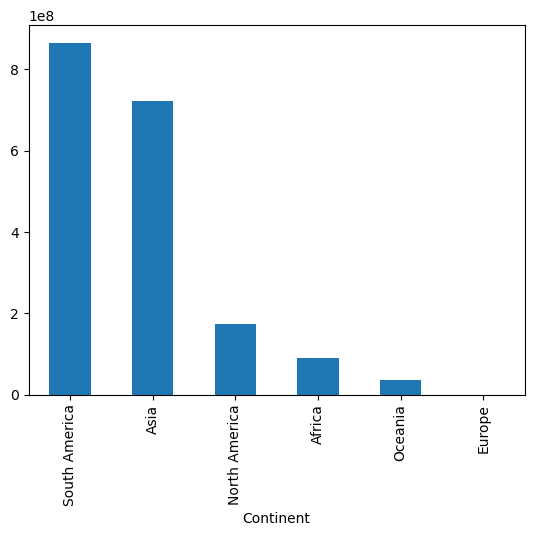

In [77]:
df_cnt['Production(Tons)'].sort_values(ascending = False).plot(kind = 'bar')

>**South America** produces maximum sugarcane.

### *Do number of countries in a Continent effects production of sugarcane?*

In [80]:
df.groupby('Continent').count()['Country']

Continent
Africa           38
Asia             25
Europe            2
North America    22
Oceania           4
South America    11
Name: Country, dtype: int64

In [81]:
df_cnt['number of countries'] = df.groupby('Continent').count()['Country']

In [82]:
df_cnt

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number of countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


<Axes: xlabel='number of countries', ylabel='Production(Tons)'>

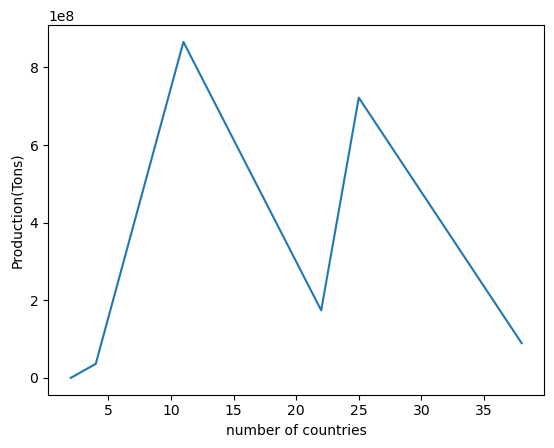

In [83]:
sns.lineplot(data = df_cnt, x = 'number of countries', y = 'Production(Tons)')

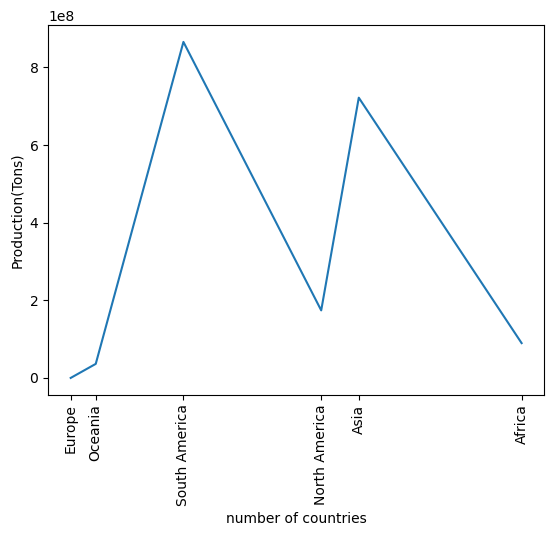

In [84]:
sns.lineplot(data = df_cnt, x = 'number of countries', y = 'Production(Tons)')
continent_names = df_cnt.index.to_list()
plt.xticks(df_cnt['number of countries'], continent_names, rotation = 90)
plt.show()

> No, the number of countries in a Continent does not effect production of sugarcane.

### *Does continent with highest land produces more sugarcane?*

In [87]:
df_cnt.head(1)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number of countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38


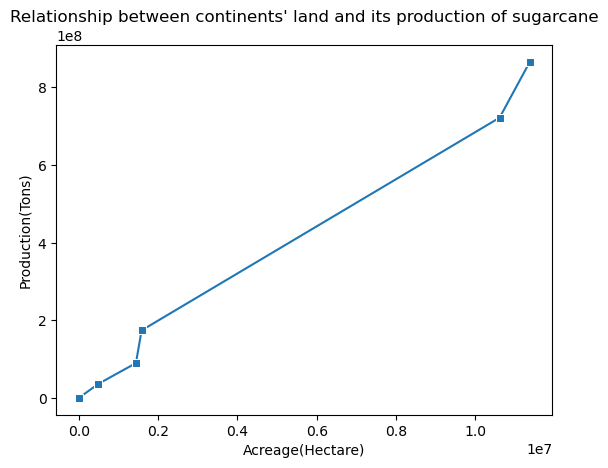

In [88]:
sns.lineplot(data = df_cnt, x = 'Acreage(Hectare)', y = 'Production(Tons)',
             marker = 's')
plt.title("Relationship between continents' land and its production of sugarcane")
plt.show()

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

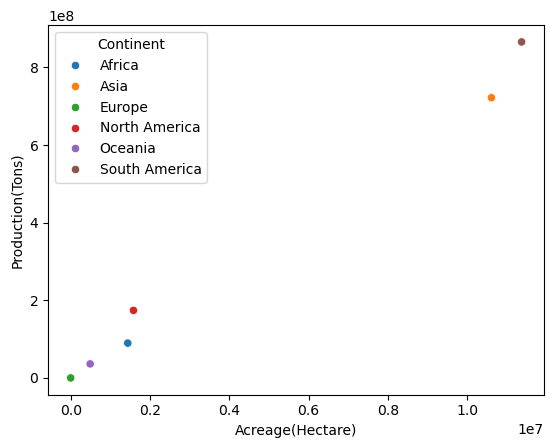

In [89]:
sns.scatterplot(data = df_cnt, x = 'Acreage(Hectare)', y = 'Production(Tons)', hue = 'Continent')

### *Production distribution by continent*

In [91]:
df_cnt

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number of countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


<Axes: ylabel='Production(Tons)'>

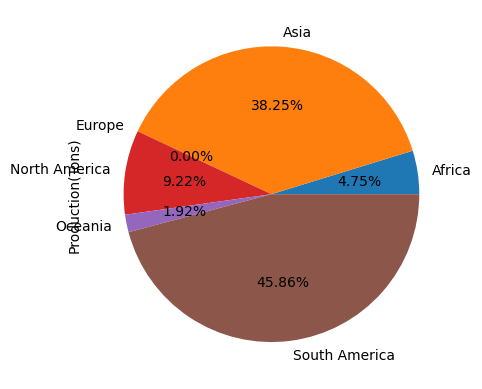

In [92]:
df_cnt['Production(Tons)'].plot(kind = 'pie', autopct = '%.2f%%' )